<a href="https://colab.research.google.com/github/damahindra/DS-E_FINALPROJECT/blob/main/Project_Data_Science_Prediksi_Exam_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek: Prediksi Exam Score


# Datasets

# Import Library

In [ ]:
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = '/content/drive/MyDrive/ProjectDataScience'
print(HOME)

/content/drive/MyDrive/ProjectDataScience


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!kaggle datasets download -d lainguyn123/student-performance-factors

/content/drive/MyDrive/ProjectDataScience/datasets
Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 8.98MB/s]


In [ ]:
!unzip -qq /content/drive/MyDrive/ProjectDataScience/datasets/student-performance-factors.zip

# Exploratory Data Analysis (EDA)

## Info Data

## Load Data

Menampilkan beberapa baris pertama dari dataset untuk mendapatkan gambaran umum menggunakan metode .head(), serta memeriksa ukuran dataset dengan menggunakan atribut .shape.

In [ ]:
data = pd.read_csv(f"{HOME}/datasets/StudentPerformanceFactors.csv")

# Menampilkan ukuran data
print(data.shape)

# Melihat 5 baris pertama data
data.head()

(6607, 20)


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

Dapat dilihat pada hasil diatas, dataset tersebut memiliki 6607 baris dan 20 kolom.

## Memeriksa Tipe Variabel Beserta Jumlah

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Terlihat bahwa terdapat 7 variabel bertipe int64 dan 13 variabel bertipe object.

## Menampilkan Deskripsi Statistik dari Data

In [ ]:
data.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

Dari hasil diatas dapat dilihat sebuah kejanggalan yaitu nilai max untuk Exam_Score yaitu 101 sedangkan yang kita tahu bahwa nilai max untuk hasil ujian adalah 100

## Data Cleaning

### Misssing Values

In [ ]:
pd.DataFrame({'Missing Value':data.isnull().sum()})

Missing Value
Hours_Studied                           0
Attendance                              0
Parental_Involvement                    0
Access_to_Resources                     0
Extracurricular_Activities              0
Sleep_Hours                             0
Previous_Scores                         0
Motivation_Level                        0
Internet_Access                         0
Tutoring_Sessions                       0
Family_Income                           0
Teacher_Quality                        78
School_Type                             0
Peer_Influence                          0
Physical_Activity                       0
Learning_Disabilities                   0
Parental_Education_Level               90
Distance_from_Home                     67
Gender                                  0
Exam_Score                              0

Dari hasil di atas, kolom "Teacher_Quality" terdapat 78 missing values, "Parental_Education_Level" terdapat 90 missing values dan "Distance_from_home" terdapat 67 missing values

 Karena jumlah data cukup besar dan representatif yaitu 6607 baris data, Kita bisa menghapus baris yang terdapat missing values tanpa banyak mempengaruhi analisis

In [ ]:
# Menghapus baris yang memiliki missing values
df_cleaned = data.dropna()

In [ ]:
pd.DataFrame({'Missing Value':df_cleaned.isnull().sum()})

Missing Value
Hours_Studied                           0
Attendance                              0
Parental_Involvement                    0
Access_to_Resources                     0
Extracurricular_Activities              0
Sleep_Hours                             0
Previous_Scores                         0
Motivation_Level                        0
Internet_Access                         0
Tutoring_Sessions                       0
Family_Income                           0
Teacher_Quality                         0
School_Type                             0
Peer_Influence                          0
Physical_Activity                       0
Learning_Disabilities                   0
Parental_Education_Level                0
Distance_from_Home                      0
Gender                                  0
Exam_Score                              0

Terlihat pada hasil diatas, missing values sudah diatasi

In [ ]:
df_cleaned.shape

(6378, 20)

Setelah missing values diatasi, data saat ini berjumlah 6378 baris

### Checking Duplicated Data

In [ ]:
df_cleaned.duplicated().sum()

0

Tidak terdapat data duplikat pada data

### Checking Outliers

Visualisasi data dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik

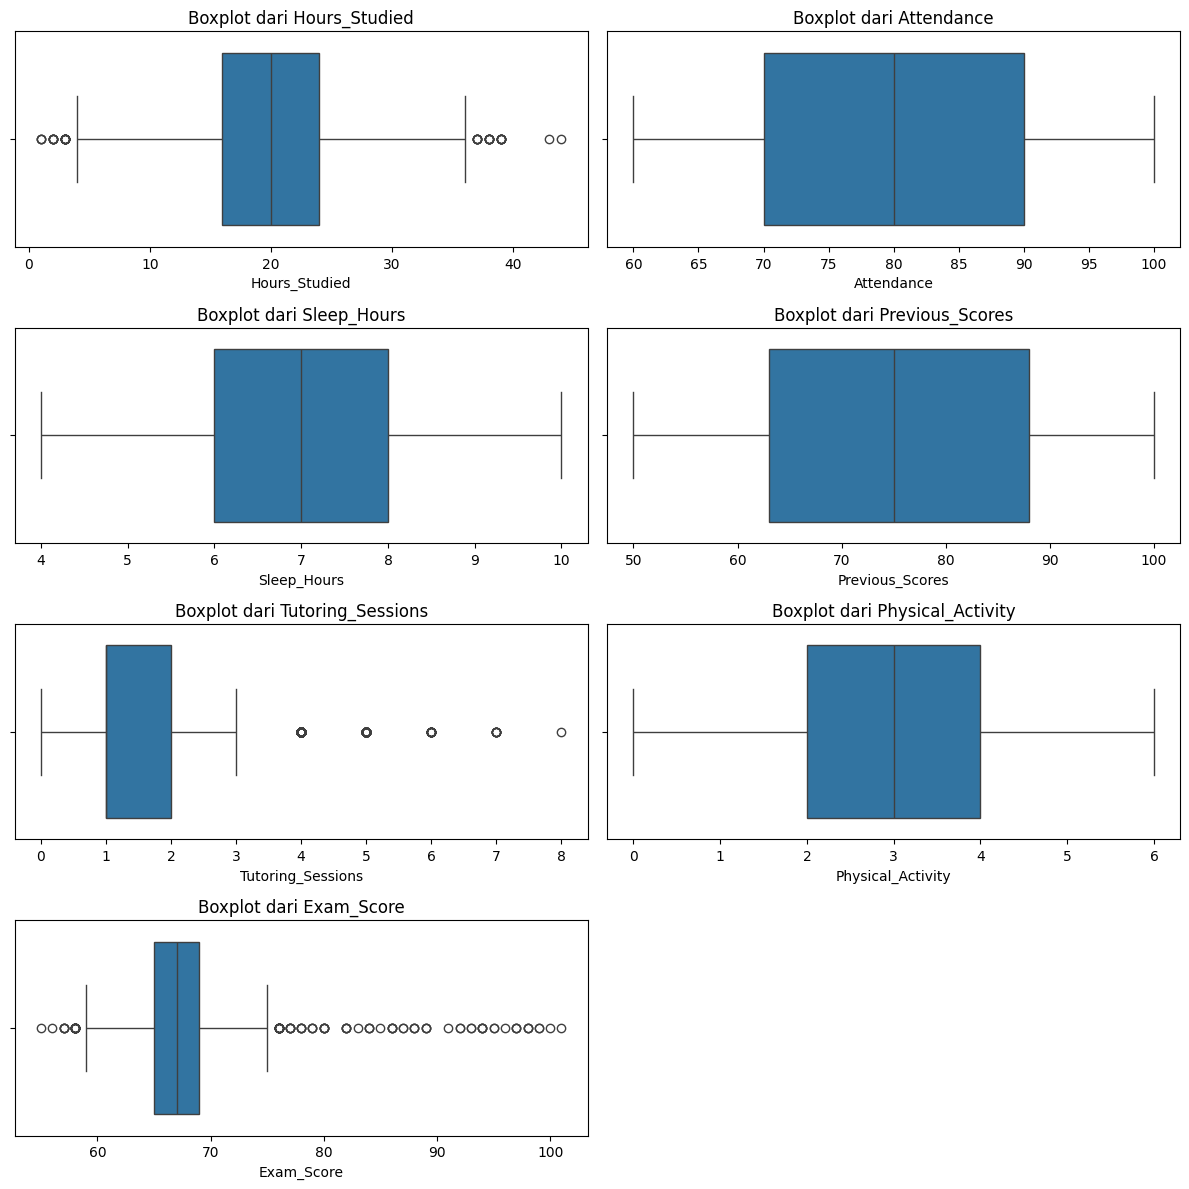

In [ ]:
# Menuliskan seluruh nama kolom numerikal
kolom_data = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]

# Membentuk plot berukuran 24 x 12
plt.figure(figsize = (12, 12))

# Membentuk plot berisi 8 subplot, dengan setiap subplot merupakan boxplot
for i in range(len(kolom_data)):

    # Membentuk plot dengan subplot berukuran 4 x 2
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x = data[kolom_data[i]])
    plt.title('Boxplot dari {}'.format(kolom_data[i]))
    plt.tight_layout()

Berikut adalah interpretasi dari boxplot yang ditampilkan di atas:

1. Pada kolom Hours_Studied,  terlihat beberapa outlier di sisi kiri (sekitar 0-5 jam) dan di sisi kanan (sekitar 35-45 jam). Meski demikian, 0-5 jam per minggu Ini mungkin terjadi, terutama jika seorang siswa tidak terlalu fokus pada studi, memiliki komitmen lain. 35-45 jam per minggu juga mungkin, terutama untuk siswa yang sangat berdedikasi. Outlier ini tidak akan dihapus karena memberikan gambaran lengkap tentang bagaimana siswa berbeda dalam waktu belajar.

2. Pada kolom Tutoring_Sessions, dapat dilihat bahwa nilai 4 hingga 8 sesi per bulan, dianggap sebagai outliers secara statistik. Namun nilai-nilai ini sangat memungkinkan karena ada siswa yang mungkin merasa perlu belajar lebih banyak sehingga outlier tidak akan dihapus.

3. Pada kolom Exam_Score, dapat dilihat bahwa mayoritas exam_score di rentang 65-70. Terdapat beberapa outlier, yaitu exam_score 75 ke atas. Namun terdapat outlier yaitu Exam_Score yang bernilai 101 yang mana tidak mungkin pada konteks ujian. Outlier lainnya akan dipertahankan karena sangat memungkinkan jika siswa mendapatkan nilai 75 keatas dan tidak melebihi 100.

Pada kolom-kolom lainnya, dapat dilihat bahwa persebaran data merata dan tidak terdapat outlier yang signifikan.
Secara keseluruhan, data ini siap untuk diproses dan dianalisis lebih mendalam tanpa perlu melakukan penghapusan outlier.

In [ ]:
df_cleaned[df_cleaned["Exam_Score"] > 100]

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
1525             27          98                  Low              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
1525                        Yes            6               93   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
1525              Low              No                  5          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
1525            High      Public       Positive                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
1525                    No              High School           Moderate   

      Gender  Exam_Score  
1525  Female         101

Menghapus baris yang memiliki Exam_Score lebih dari 100


In [ ]:
df_cleaned.drop(df_cleaned[df_cleaned["Exam_Score"] > 100].index, inplace=True)

<ipython-input-16-8f7d99abc49b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(df_cleaned[df_cleaned["Exam_Score"] > 100].index, inplace=True)


In [ ]:
df_cleaned.shape

(6377, 20)

Setelah missing values diatasi, data saat ini berjumlah 6377 baris

## Univariate Analysis

Pertama, kita akan mengelompokkan variabel-variabel yang ada menjadi dua kategori: kategori numerik dan kategori kategorikal.

In [ ]:
# Membuat daftar untuk kolom-kolom numerik (dengan tipe data int64)
kolom_numerikal = [kolom for kolom in data if df_cleaned[kolom].dtype == "int64"]

# Membuat daftar untuk kolom-kolom kategorikal (dengan tipe data object)
kolom_kategorikal = [kolom for kolom in data if df_cleaned[kolom].dtype == "object"]

# Menampilkan daftar kolom numerik dan kolom kategorikal
print("Kolom-kolom numerik: ", kolom_numerikal)
print("Kolom-kolom kategorikal: ", kolom_kategorikal)

Kolom-kolom numerik:  ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Kolom-kolom kategorikal:  ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


Melihat nilai-nilai pada kolom kategorikal

In [ ]:
# Menghitung jumlah nilai yang berbeda untuk setiap variabel pada kolom kategorikal
jumlah_unik = data[kolom_kategorikal].nunique()

# Mengambil nilai-nilai unik untuk setiap variabel dalam kolom kategorikal
nilai_unik = data[kolom_kategorikal].apply(lambda x: x.unique())

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Jumlah Nilai Unik": jumlah_unik, "Nilai-Nilai": nilai_unik})

Jumlah Nilai Unik  \
Parental_Involvement                        3   
Access_to_Resources                         3   
Extracurricular_Activities                  2   
Motivation_Level                            3   
Internet_Access                             2   
Family_Income                               3   
Teacher_Quality                             3   
School_Type                                 2   
Peer_Influence                              3   
Learning_Disabilities                       2   
Parental_Education_Level                    3   
Distance_from_Home                          3   
Gender                                      2   

                                                          Nilai-Nilai  
Parental_Involvement                              [Low, Medium, High]  
Access_to_Resources                               [High, Medium, Low]  
Extracurricular_Activities                                  [No, Yes]  
Motivation_Level                                  [Low, Medium, High]  
Internet_Access                                             [Yes, No]  
Family_Income                                     [Low, Medium, High]  
Teacher_Quality                              [Medium, High, Low, nan]  
School_Type                                         [Public, Private]  
Peer_Influence                          [Positive, Negative, Neutral]  
Learning_Disabilities                                       [No, Yes]  
Parental_Education_Level    [High School, College, Postgraduate, nan]  
Distance_from_Home                         [Near, Moderate, Far, nan]  
Gender                                                 [Male, Female]

Selanjutnya, kita akan memeriksa jumlah dari setiap nilai yang tertera pada hasil sebelumnya

In [ ]:
# Menyusun deskripsi untuk kolom-kolom kategorikal yang akan digunakan
deskripsi_kolom_kategorikal = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Extracurricular_Activities",
    "Motivation_Level",
    "Internet_Access",
    "Family_Income",
    "Teacher_Quality",
    "School_Type",
    "Peer_Influence",
    "Learning_Disabilities",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Gender"
]

# Tentukan jumlah kolom yang ingin ditampilkan
jumlah_kolom = len(deskripsi_kolom_kategorikal)

# Tentukan ukuran subplot yang sesuai
baris = (jumlah_kolom + 3) // 4  # Menghitung jumlah baris yang dibutuhkan
fig, axes = plt.subplots(baris, 4, figsize=(20, baris * 5))

# Mengubah array multidimensi menjadi array satu dimensi
axes = axes.flatten()

# Membuat bar plot untuk jumlah setiap kolom
for i, kolom in enumerate(df_cleaned[kolom_kategorikal].columns):
    sns.countplot(x=kolom, data=df_cleaned, ax=axes[i], hue=kolom)

    # Menambahkan judul untuk setiap plot
    judul = "\n".join(textwrap.wrap(f"Plot {deskripsi_kolom_kategorikal[i]}", width=40))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label pada sumbu x
    axes[i].tick_params(axis="x", labelrotation=90)
    axes[i].tick_params(axis="both", which="major", labelsize=12)
    axes[i].set_xlabel("")

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mengatur tata letak agar tidak saling bertumpuk
plt.tight_layout()

# Menampilkan plot
plt.show()

Secara umum, plot-plot pada gambar diatas dapat diinterpretasikan sebagai berikut:

1. Parental_Involvement: Sebagian besar siswa memiliki keterlibatan orang tua yang tinggi.
2. Access_to_Resources: Sebagian besar siswa memiliki akses ke sumber daya pada level medium.
3. Extracurricular_Activities: Sebagian besar siswa terlibat dalam aktivitas ekstrakurikuler.
4. Motivation_Level: Sebagian besar siswa memiliki tingkat motivasi pada level medium.
5. Internet_Access: Sebagian besar siswa memiliki akses internet.
6. Family_Income: Sebaran data pendapatan keluarga siswa cukup merata antara level medium dan low.
7. Teacher_Quality: Sebagian besar siswa memiliki kualitas guru di level medium.
8. School_Type: Sebagian besar siswa berasal dari sekolah negeri (public).
9. Peer_Influence: Sebaran data pengaruh teman sebaya cukup merata di level neutral dan positive.
10. Learning_Disabilites: Sebagian besar siswa tidak memiliki disabilitas belajar.
11. Parental_Education_Level: Sebagian besar siswa memiliki orang tua dengan tingkat pendidikan setara sekolah menengah atas.
12. Distance_from_Home: Sebagian besar siswa memiliki jarak tempat tinggal yang dekat dari sekolah.
13. Gender: Sebagian besar siswa adalah laki-laki.

Membuat histogram untuk variabel-variabel numerikal guna menganalisis persebaran data.

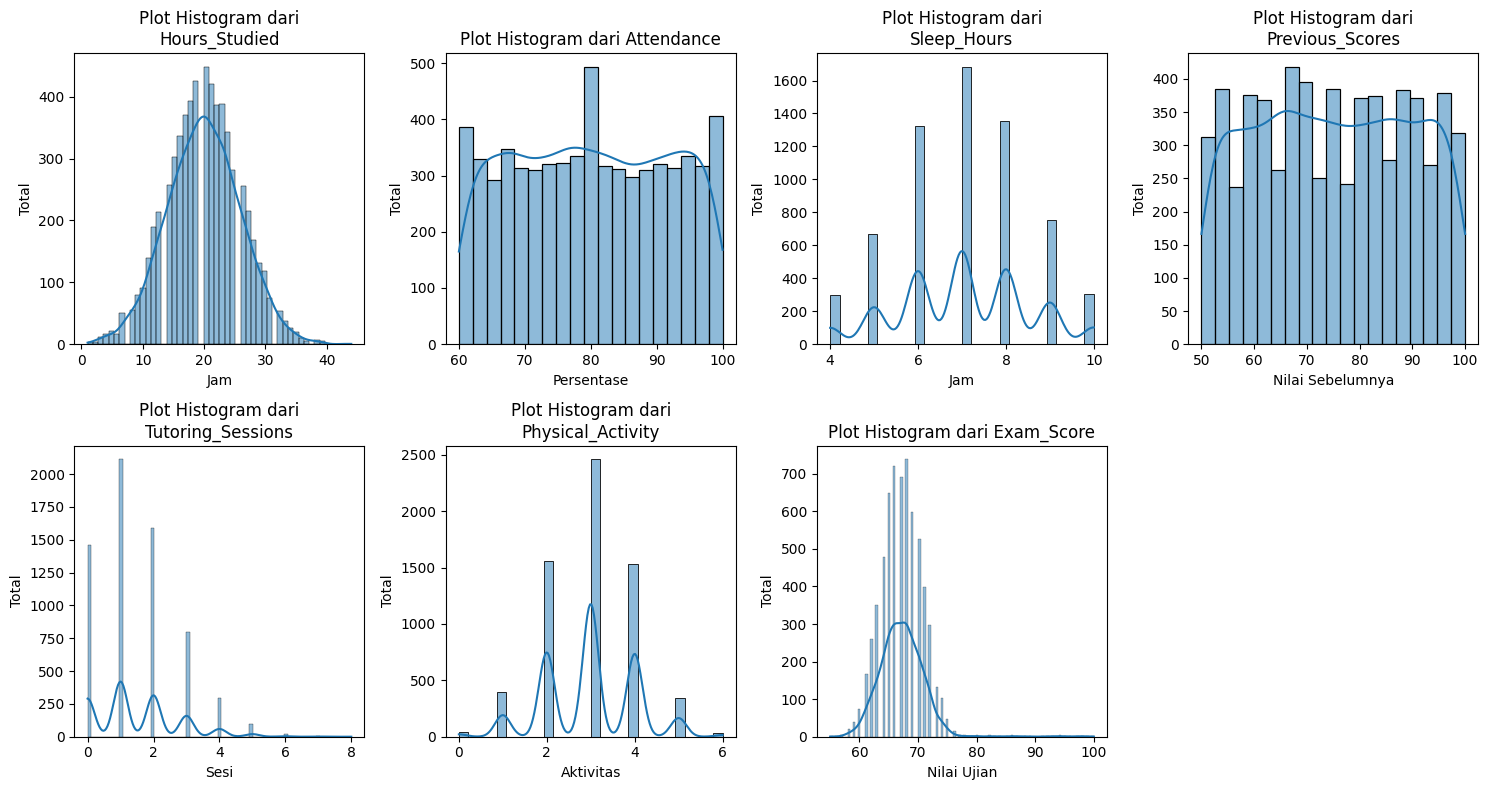

In [ ]:
# Membuat plot dengan delapan subplot dalam format 2 x 4
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Mengubah array multidimensi menjadi array satu dimensi
axes = axes.flatten()

# Menambahkan satuan untuk setiap kolom
labels = ["Jam", "Persentase", "Jam", "Nilai Sebelumnya", "Sesi", "Aktivitas", "Nilai Ujian"]

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan
deskripsi_kolom_numerikal = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores",
    "Tutoring_Sessions",
    "Physical_Activity",
    "Exam_Score"
]

# Membuat histogram untuk jumlah setiap kolom
for i, kolom in enumerate(df_cleaned[kolom_numerikal].columns):
    sns.histplot(data=df_cleaned, x=kolom, kde=True, ax=axes[i])

    # Menambahkan judul untuk setiap plot
    judul = "\n".join(textwrap.wrap(f"Plot Histogram dari {deskripsi_kolom_numerikal[i]}", width=30))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label pada sumbu x
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel("Total")

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Mengatur tata letak agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan hasil plot histogram yang disajikan, dapat diinterpretasikan sebagai berikut:

1. Hours_Studied:
Distribusi data membentuk kurva normal dengan puncak di sekitar 20-25 jam.
Mayoritas mahasiswa belajar sekitar 20-30 jam.
Terdapat beberapa mahasiswa dengan jam belajar yang lebih ekstrim, baik sangat sedikit maupun sangat banyak.
2. Attendance:
Distribusi data menunjukkan pola bimodal, dengan dua puncak di sekitar 70-80% dan 90-100%.
Mayoritas mahasiswa memiliki kehadiran di atas 80%.
Terdapat beberapa mahasiswa dengan kehadiran yang rendah.
3. Sleep_Hours:
Distribusi data menunjukkan pola normal dengan puncak di sekitar 6-8 jam tidur.
Mayoritas mahasiswa tidur sekitar 6-8 jam per hari.
Terdapat beberapa mahasiswa dengan jam tidur yang ekstrim, baik sedikit maupun banyak.
4. Previous_Scores:
Distribusi data cenderung simetris dengan puncak di sekitar 70-80.
Mayoritas mahasiswa memiliki skor sebelumnya di rentang 70-80.
Terdapat beberapa mahasiswa dengan skor yang sangat rendah maupun sangat tinggi.
5. Tutoring_Sessions:
Distribusi data menunjukkan pola bimodal dengan dua puncak di sekitar 1 dan 6 sesi.
Mayoritas mahasiswa mengikuti 1-2 sesi tutorial atau 5-6 sesi tutorial.
Terdapat beberapa mahasiswa dengan jumlah sesi tutorial yang sangat sedikit maupun sangat banyak.
6. Physical_Activity:
Distribusi data menunjukkan pola bimodal dengan dua puncak yang jelas.
Mayoritas mahasiswa memiliki aktivitas fisik yang rendah atau sangat tinggi.
Terdapat sedikit mahasiswa dengan aktivitas fisik yang moderat.
7. Exam_Score:
Distribusi data cenderung normal dengan puncak di sekitar 70-80.
Mayoritas mahasiswa memperoleh skor ujian di rentang 70-80.
Terdapat beberapa mahasiswa dengan skor ujian yang sangat rendah maupun sangat tinggi.


## Multivariate Analysis

Mengecek rata-rata nilai ujian terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap nilai ujian

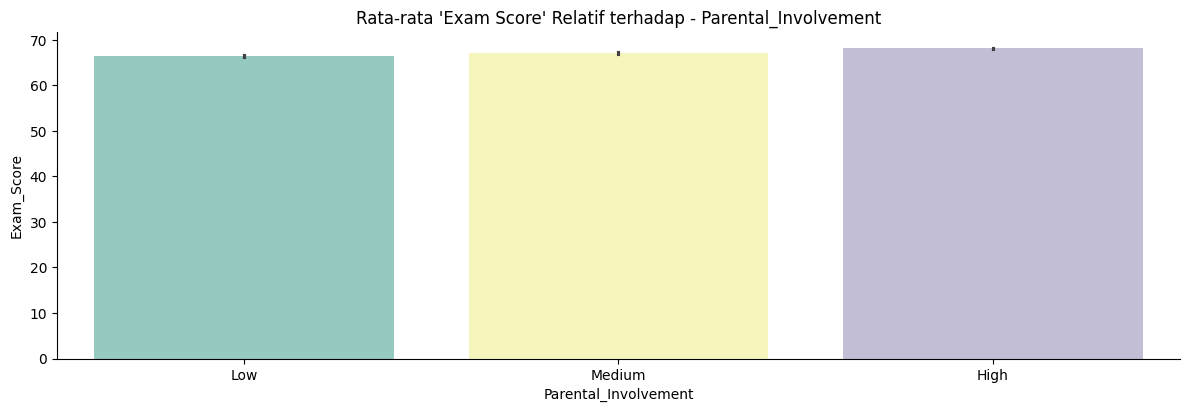

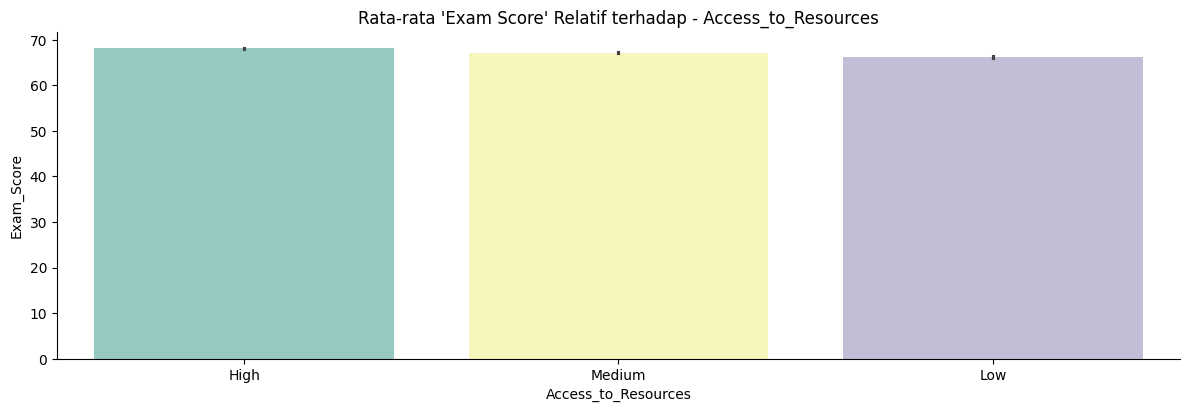

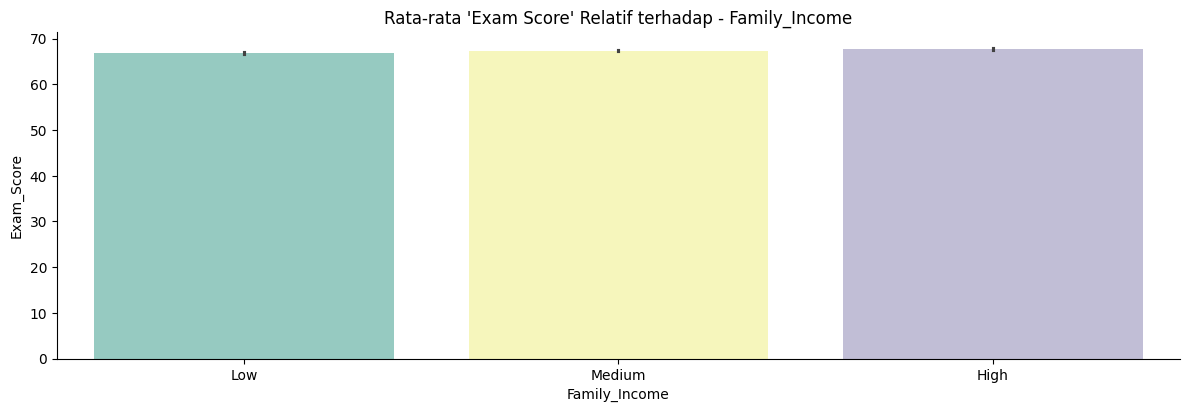

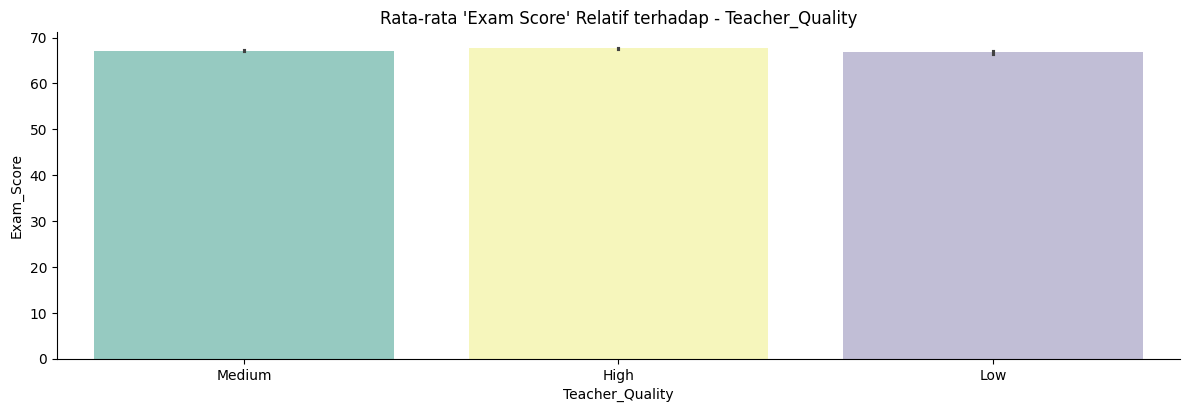

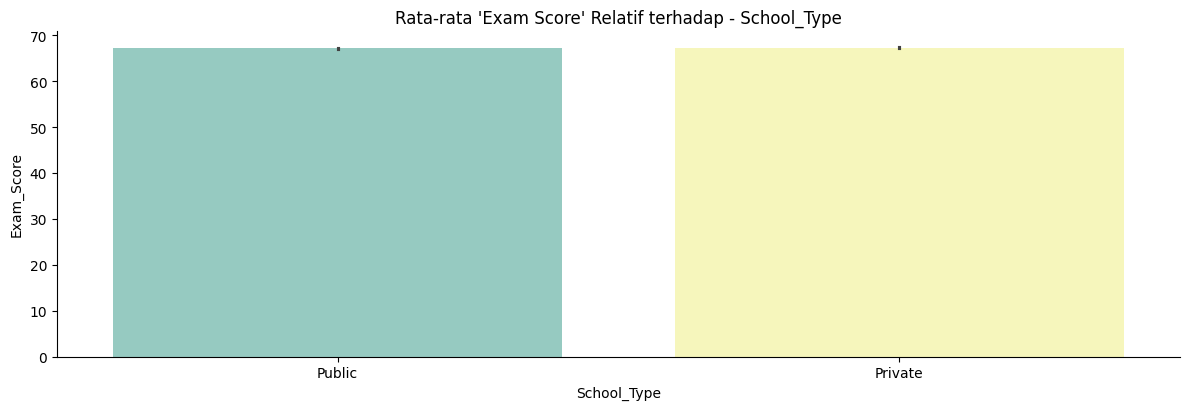

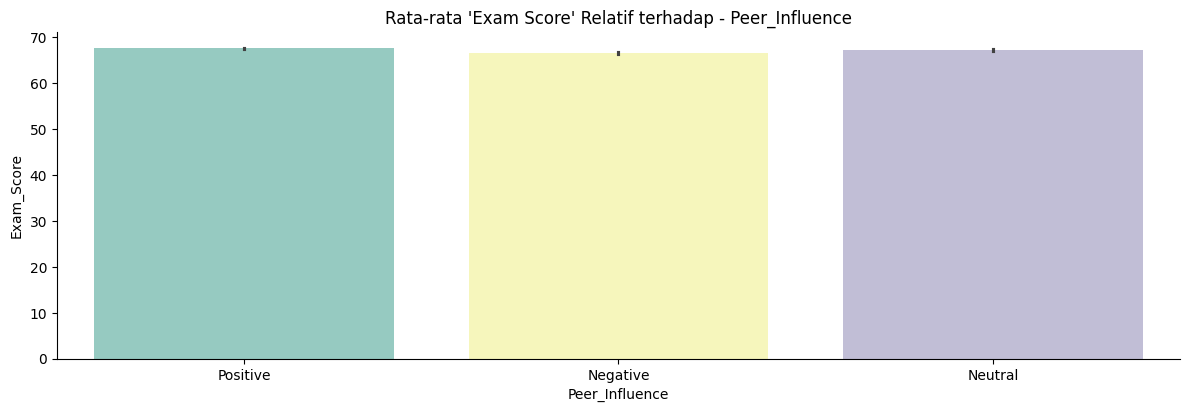

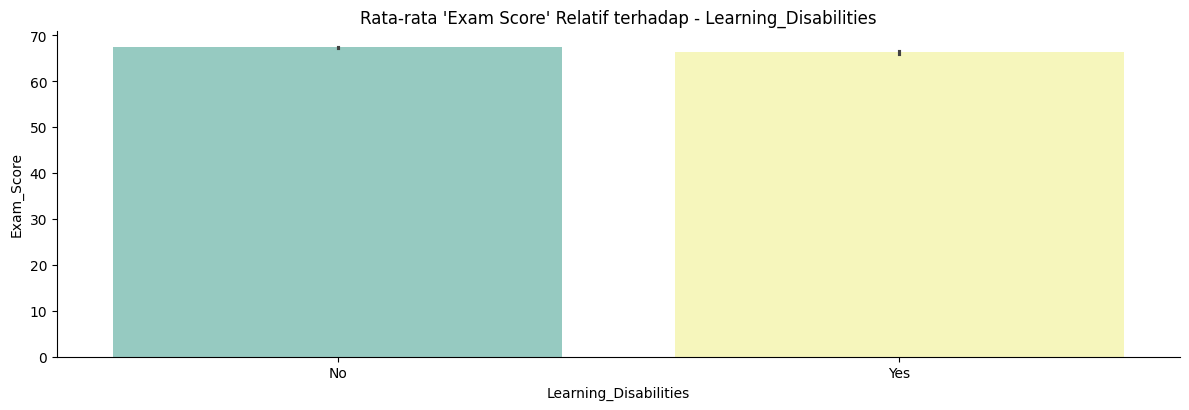

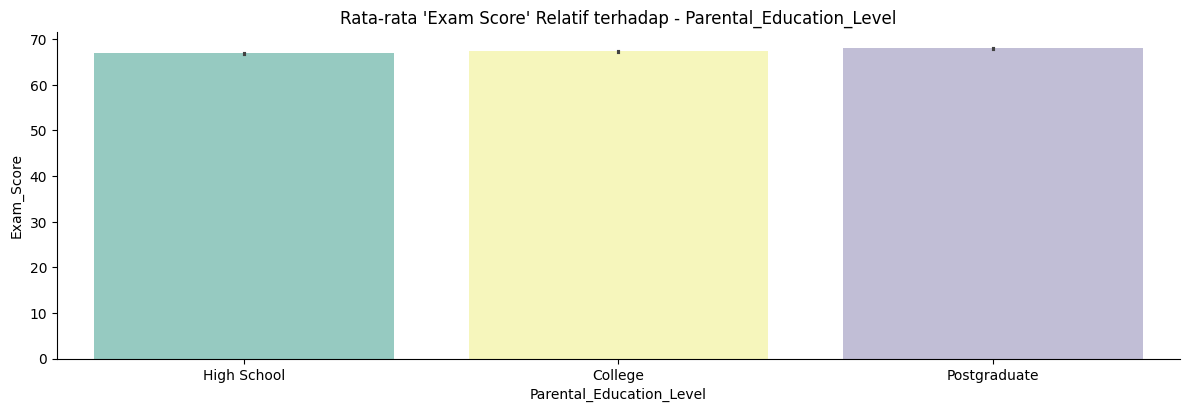

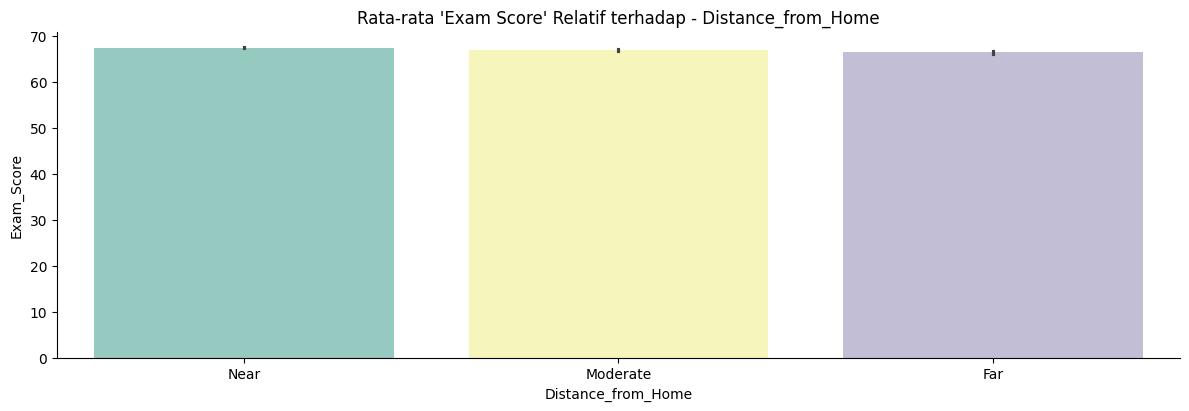

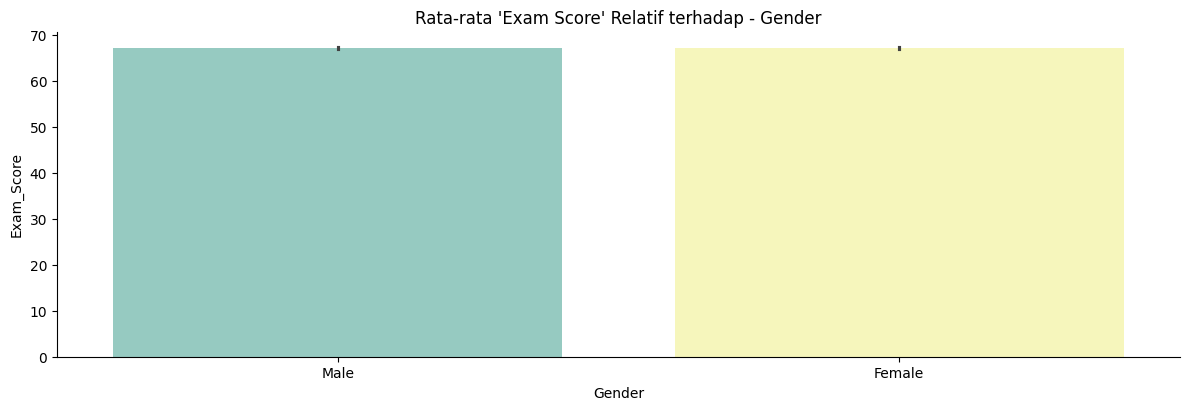

In [ ]:
cat_features = df_cleaned.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    sns.catplot(x=col, y="Exam_Score", hue=col, kind="bar", dodge=False,
                height=4, aspect=3, data=df_cleaned, palette="Set3", legend=False)
    plt.title("Rata-rata 'Exam Score' Relatif terhadap - {}".format(col))

In [ ]:
# Menghitung rata-rata Exam_Score untuk setiap kategori
for col in cat_features:
    avg_scores = df_cleaned.groupby(col)["Exam_Score"].mean().reset_index()
    avg_scores.columns = [col, "Average Exam Score"]  # Mengatur nama kolom
    print(avg_scores)

  Parental_Involvement  Average Exam Score
0                 High           68.112200
1                  Low           66.351938
2               Medium           67.113196
  Access_to_Resources  Average Exam Score
0                High           68.103158
1                 Low           66.223705
2              Medium           67.145801
  Extracurricular_Activities  Average Exam Score
0                         No           66.951770
1                        Yes           67.446138
  Motivation_Level  Average Exam Score
0             High           67.743931
1              Low           66.746108
2           Medium           67.338894
  Internet_Access  Average Exam Score
0              No           66.483471
1             Yes           67.309520
  Family_Income  Average Exam Score
0          High           67.814483
1           Low           66.853215
2        Medium           67.371005
  Teacher_Quality  Average Exam Score
0            High           67.664391
1             Low      

1. Learning_Disabilities: Mahasiswa tanpa learning disabilities memiliki rata-rata skor ujian yang lebih tinggi (67.36) dibandingkan dengan yang memiliki learning disabilities (66.29).
2. Parental_Involvement: Mahasiswa dengan keterlibatan orang tua yang tinggi memiliki rata-rata skor ujian yang lebih tinggi (68.11) dibandingkan dengan yang rendah (66.35) atau sedang (67.11).
3. Access_to_Resources: Mahasiswa dengan akses sumber daya yang tinggi memiliki rata-rata skor ujian yang lebih tinggi (68.10) dibandingkan dengan yang rendah (66.22) atau sedang (67.15).
4. Extracurricular_Activities: Mahasiswa yang terlibat dalam kegiatan ekstrakurikuler memiliki rata-rata skor ujian yang lebih tinggi (67.45) dibandingkan dengan yang tidak terlibat (66.95).
5. Motivation_Level: Mahasiswa dengan motivasi tinggi memiliki rata-rata skor ujian yang lebih tinggi (67.74) dibandingkan dengan yang rendah (66.75) atau sedang (67.34).
Variabel lainnya juga menunjukkan perbedaan rata-rata skor ujian, meskipun mungkin tidak terlalu signifikan.

Untuk memudahkan visualisasi dibuat kolom baru berisi interval Exam_Score

In [ ]:
# Membuat kolom interval untuk Exam_Score
bins = [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]  # Interval khusus
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]  # Label untuk setiap interval
df_cleaned['Exam_Score_Bin'] = pd.cut(df_cleaned['Exam_Score'], bins=bins, labels=labels, right=False)

<ipython-input-24-9bf40085a9ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Exam_Score_Bin'] = pd.cut(df_cleaned['Exam_Score'], bins=bins, labels=labels, right=False)


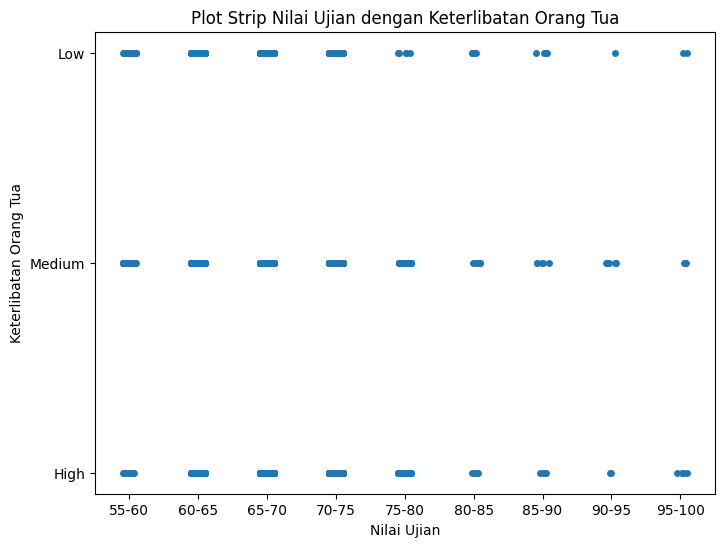

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Parental_Involvement")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Keterlibatan Orang Tua")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Keterlibatan Orang Tua")

# Menampilkan plot
plt.show()

Pada nilai ujian yang tinggi (90-95 dan 95-100), keterlibatan orang tua juga cenderung tinggi.

Pada rentang nilai ujian yang lebih rendah (55-60, 60-65, 65-70), keterlibatan orang tua terlihat lebih beragam, dengan nilai yang tersebar di level rendah, sedang, dan tinggi.

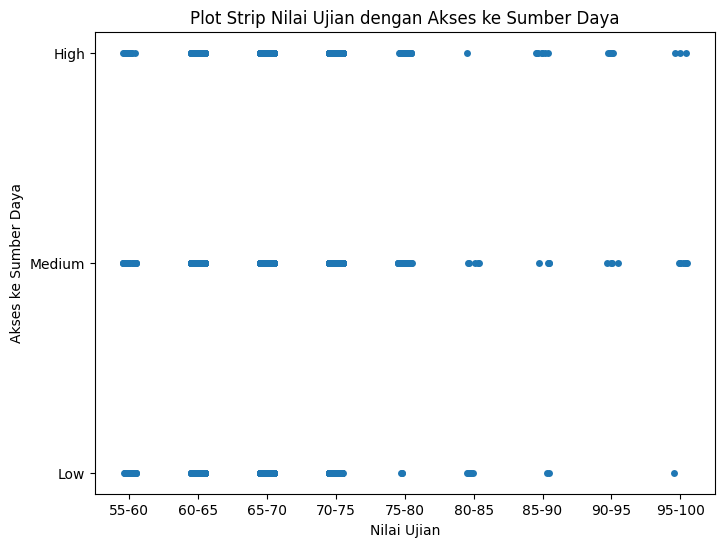

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Access_to_Resources")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Akses ke Sumber Daya")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Akses ke Sumber Daya")

# Menampilkan plot
plt.show()

Berdasarkan pengamatan terhadap plot strip, terlihat bahwa pada rentang nilai ujian yang lebih rendah (55-60, 60-65, 65-70), akses ke sumber daya cenderung berada pada level yang lebih rendah.

Pada nilai ujian yang lebih tinggi (90-95 dan 95-100), akses ke sumber daya cenderung medium dan tinggi.

Terdapat kesenjangan dalam hal akses ke sumber daya pendidikan antara siswa dengan nilai ujian tinggi dan rendah.

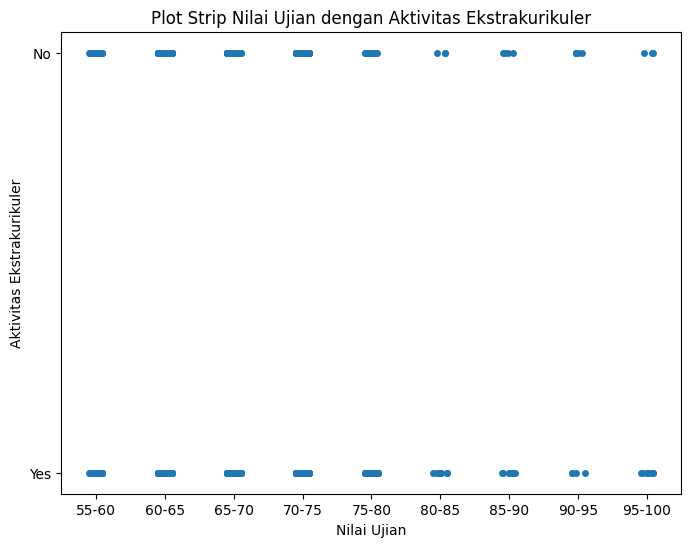

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Extracurricular_Activities")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Aktivitas Ekstrakurikuler")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Aktivitas Ekstrakurikuler")

# Menampilkan plot
plt.show()

Pada rentang nilai ujian yang lebih tinggi (90-95 dan 95-100), siswa terlibat dalam aktivitas ekstrakurikuler sedikit lebih banyak.

Pada nilai lainnya penyebaran data tampak merata yang tidak menunjukkan adanya pengaruh signifikan.

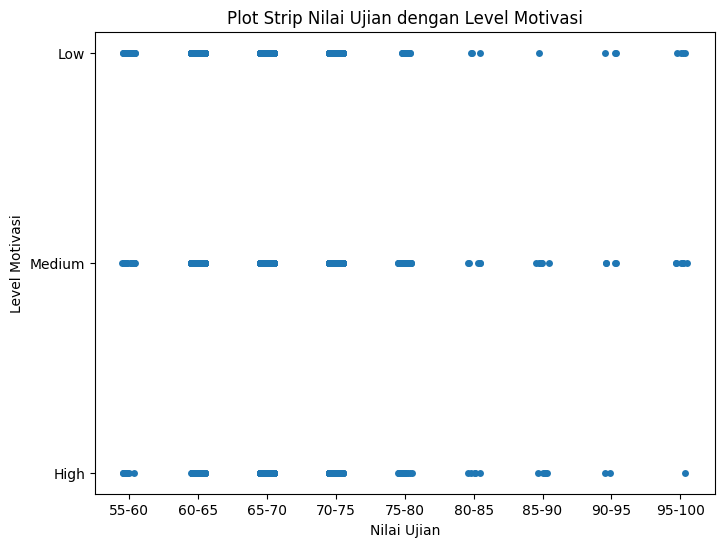

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Motivation_Level")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Level Motivasi")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Level Motivasi")

# Menampilkan plot
plt.show()

Terdapat tren terbalik antara nilai ujian siswa dan tingkat motivasi mereka, di mana siswa dengan nilai ujian yang tinggi memiliki motivasi yang rendah.

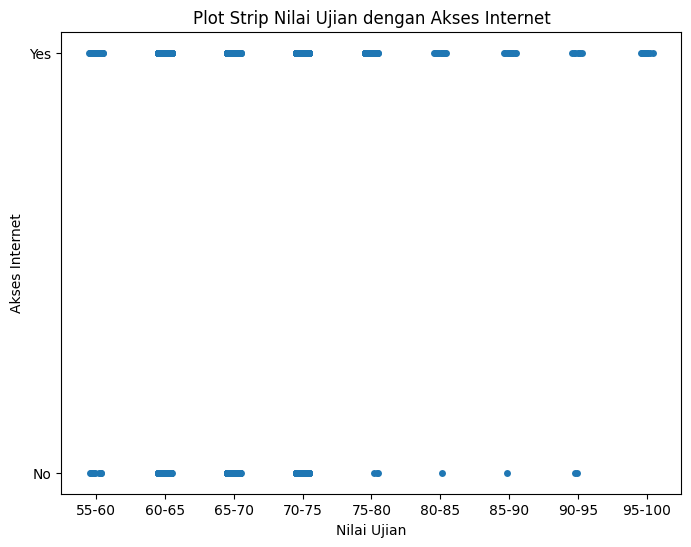

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Internet_Access")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Akses Internet")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Akses Internet")

# Menampilkan plot
plt.show()

Terdapat perbedaan yang jelas dalam hal akses internet antara siswa dengan nilai ujian rendah dan siswa dengan nilai ujian tinggi. Siswa dengan nilai ujian yang tinggi cenderung memiliki akses internet yang baik.

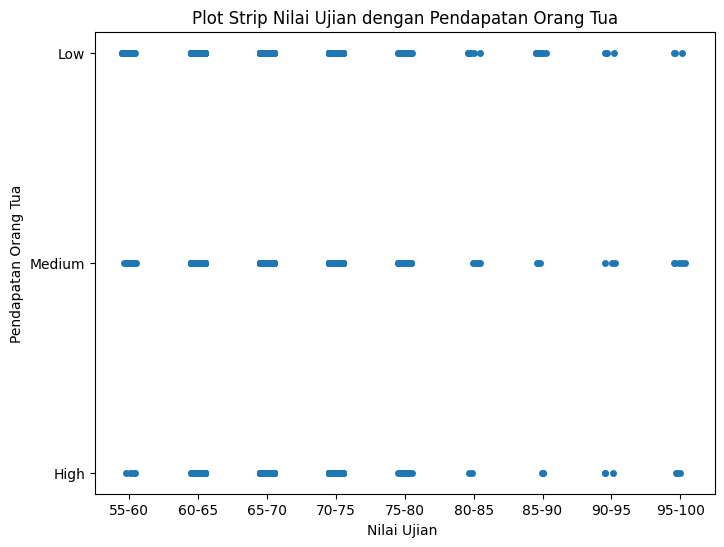

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Family_Income")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Pendapatan Orang Tua")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian ")
plt.ylabel("Pendapatan Orang Tua")

# Menampilkan plot
plt.show()

Penyebaran data terlihat merata menunjukkan pendapatan orang tua tidak terlalu memiliki pengaruh signifikan

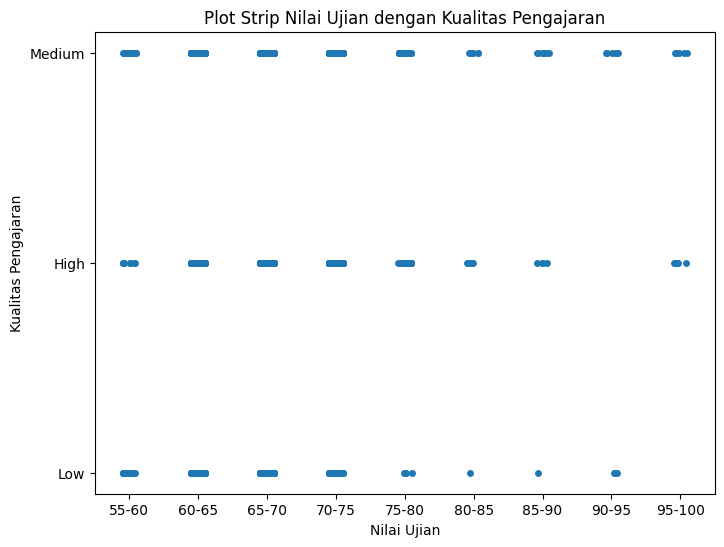

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Teacher_Quality")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Kualitas Pengajaran")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Kualitas Pengajaran")

# Menampilkan plot
plt.show()

Pada rentang nilai ujian yang tinggi, kualitas pengajaran yang diterima siswa cenderung berada di level medium.

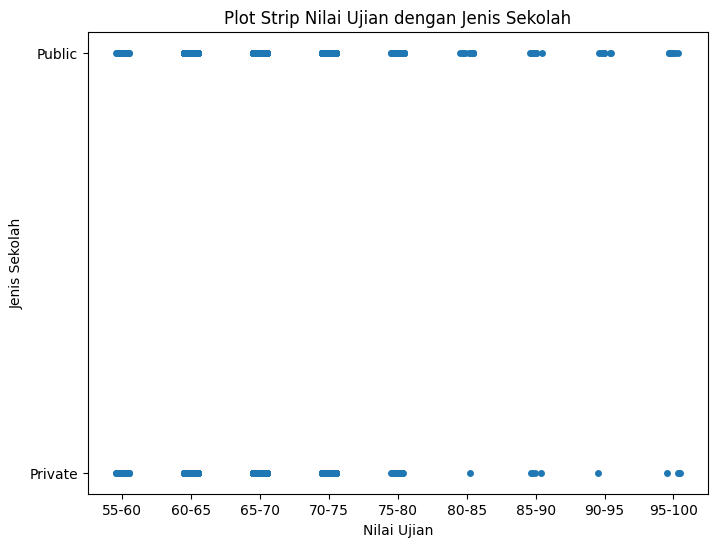

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "School_Type")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Jenis Sekolah")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Jenis Sekolah")

# Menampilkan plot
plt.show()

Siswa yang mendapatkan nilai tinggi cenderung bersekolah pada sekolah negeri.

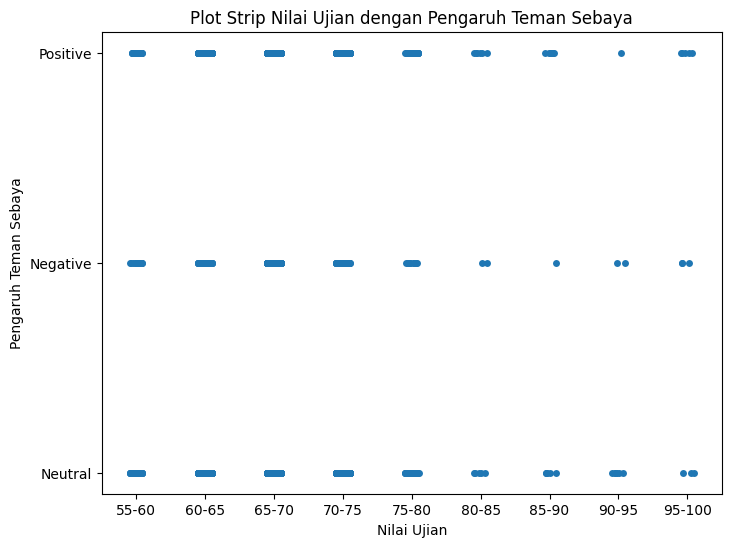

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Peer_Influence")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Pengaruh Teman Sebaya")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Pengaruh Teman Sebaya")

# Menampilkan plot
plt.show()

Terlihat bahwa siswa yang memiliki nilai baik didominasi oleh siswa yang memiliki pengaruh teman sebaya netral dan positif

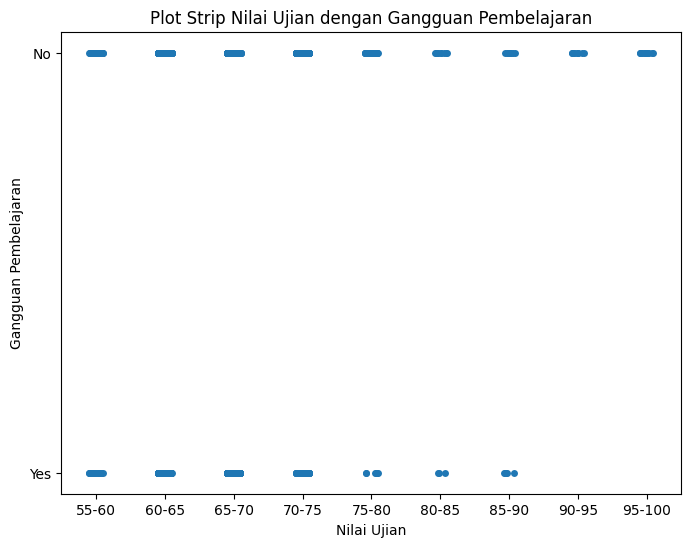

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Learning_Disabilities")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Gangguan Pembelajaran")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Gangguan Pembelajaran")

# Menampilkan plot
plt.show()

Siswa yang tidak memiliki gangguan belajar lebih banyak mendapatkan nilai yang baik dibandingkan siswa yang memiliki gangguan belajar.

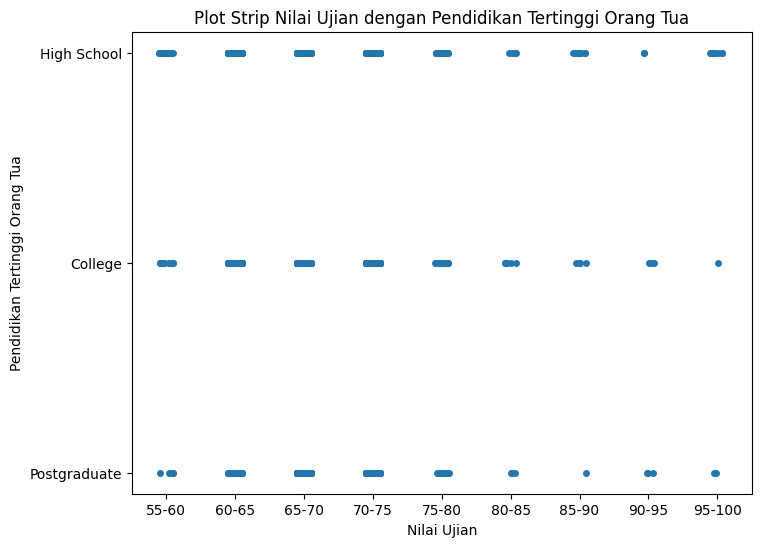

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Parental_Education_Level")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Pendidikan Tertinggi Orang Tua")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Pendidikan Tertinggi Orang Tua")

# Menampilkan plot
plt.show()

Pada gambar diatas, terlihat bahwa siswa yang memiliki nilai yang sangat baik pendidikan tertinggi orang tuanya adalah sekolah menengah atas.

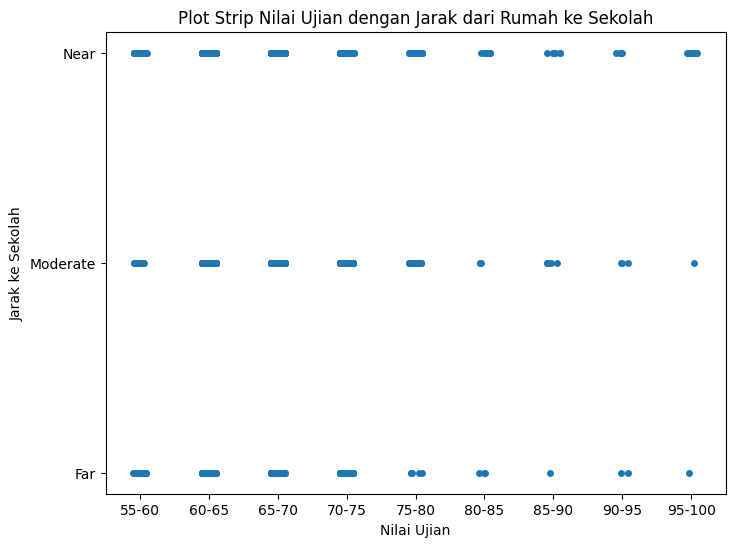

In [ ]:
# Membentuk plot strip
plt.figure(figsize = (8, 6))
sns.stripplot(data = df_cleaned, x = "Exam_Score_Bin", y = "Distance_from_Home")

# Menambahkan judul pada plot
plt.title("Plot Strip Nilai Ujian dengan Jarak dari Rumah ke Sekolah")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Nilai Ujian")
plt.ylabel("Jarak ke Sekolah")

# Menampilkan plot
plt.show()

Siswa yang rumahnya dekat dengan sekolah cenderung memiliki nilai ujian baik. Ini terlihat dari semakin banyaknya titik-titik biru yang menunjukkan nilai "Near" pada nilai ujian yang semakin tinggi.

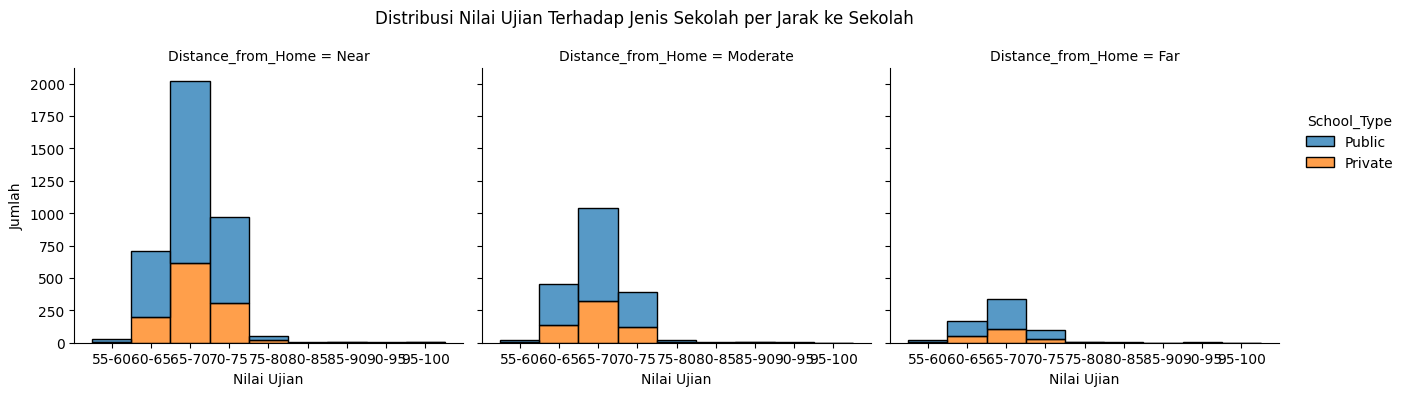

In [ ]:
# Membentuk plot dsitribusi antara tingkat berat badan dengan konsumsi makanan di antara makan berat
plot_six = sns.displot(df_cleaned, x = "Exam_Score_Bin", hue = "School_Type", multiple = "stack", col = "Distance_from_Home", height = 4)

# Mengubah letak legend
sns.move_legend(plot_six, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan judul untuk seluruh plot
plt.suptitle('Distribusi Nilai Ujian Terhadap Jenis Sekolah per Jarak ke Sekolah', fontsize = 12)

# Menambahkan label sumbu x dan y pada plot
for ax in plot_six.axes.flat:
    ax.set_xlabel("Nilai Ujian")
plot_six.set(ylabel = "Jumlah")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

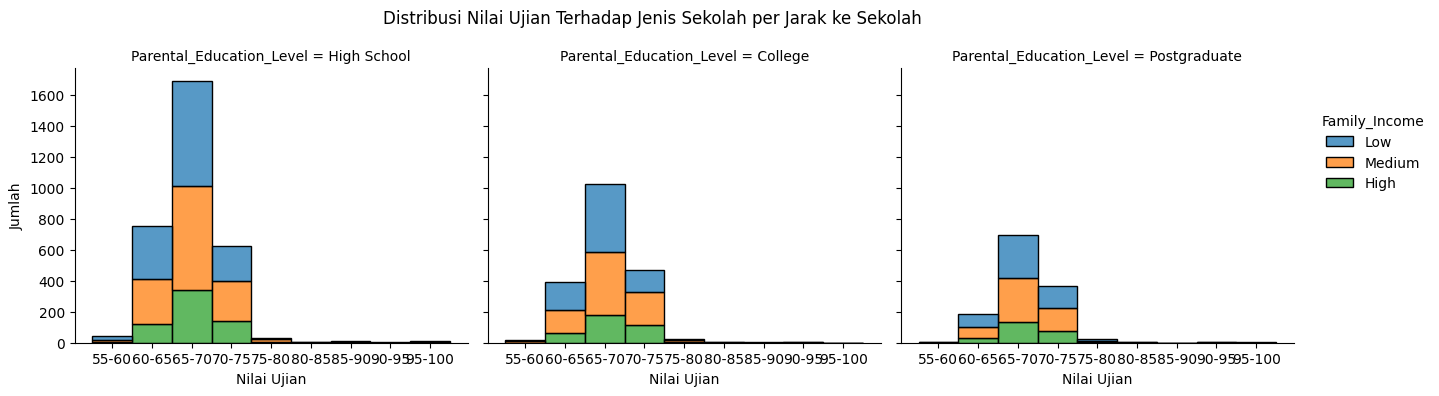

In [ ]:
# Membentuk plot dsitribusi antara tingkat berat badan dengan konsumsi makanan di antara makan berat
plot_six = sns.displot(df_cleaned, x = "Exam_Score_Bin", hue = "Family_Income", multiple = "stack", col = "Parental_Education_Level", height = 4)

# Mengubah letak legend
sns.move_legend(plot_six, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan judul untuk seluruh plot
plt.suptitle('Distribusi Nilai Ujian Terhadap Jenis Sekolah per Jarak ke Sekolah', fontsize = 12)

# Menambahkan label sumbu x dan y pada plot
for ax in plot_six.axes.flat:
    ax.set_xlabel("Nilai Ujian")
plot_six.set(ylabel = "Jumlah")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# Membentuk plot dsitribusi antara tingkat berat badan dengan konsumsi makanan di antara makan berat
plot_six = sns.displot(df_cleaned, x = "Exam_Score_Bin", hue = "Teacher_Quality", multiple = "stack", col = "Internet_Access", height = 4)

# Mengubah letak legend
sns.move_legend(plot_six, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan judul untuk seluruh plot
plt.suptitle('Distribusi Nilai Ujian Terhadap Jenis Sekolah per Jarak ke Sekolah', fontsize = 12)

# Menambahkan label sumbu x dan y pada plot
for ax in plot_six.axes.flat:
    ax.set_xlabel("Nilai Ujian")
plot_six.set(ylabel = "Jumlah")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

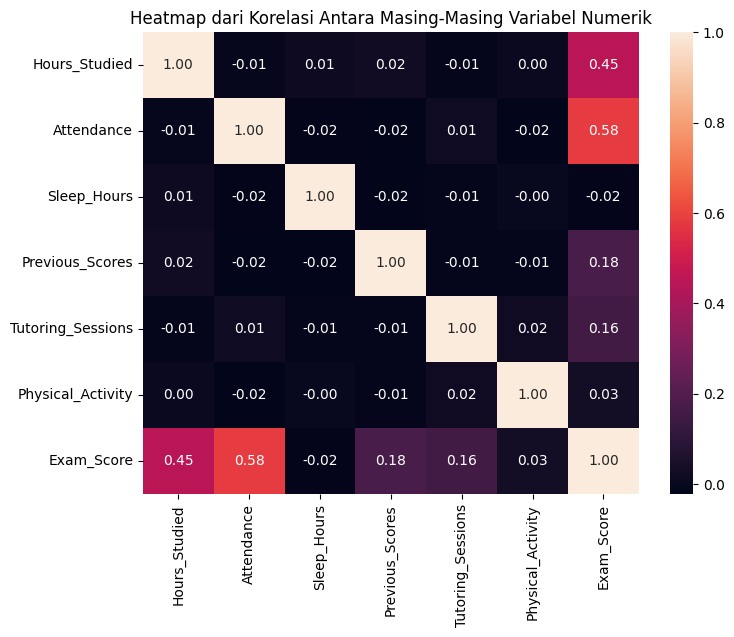

In [ ]:
# Mencari korelasi antara masing-masing variabel numerik dengan korelasi pearson
corr = data.corr(method = "pearson", numeric_only = True)

# Membentuk heatmap antara masing-masing variabel numerik dan ditampilkan dalam bentuk desimal 2 angka di belakang koma
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws = {"size": 10})

# Menambahkan judul pada plot
plt.title("Heatmap dari Korelasi Antara Masing-Masing Variabel Numerik")

# Menampilkan plot
plt.show()

Berdasarkan heatmap yang ditunjukkan, dapat disimpulkan bahwa:
*   Terdapat korelasi positif yang kuat antara variabel-variabel tertentu,
yaitu jam belajar (Hours_Studied) dengan skor ujian (Exam_Score), serta kehadiran (Attendance) dengan skor ujian.
*   Terdapat korelasi positif yang lemah antara variabel-variabel tertentu,
yaitu nilai sebelumnya (Previous_Score) dengan skor ujian (Exam_Score), serta banyak sesi les (Tutoring_Sessions) dengan skor ujian.




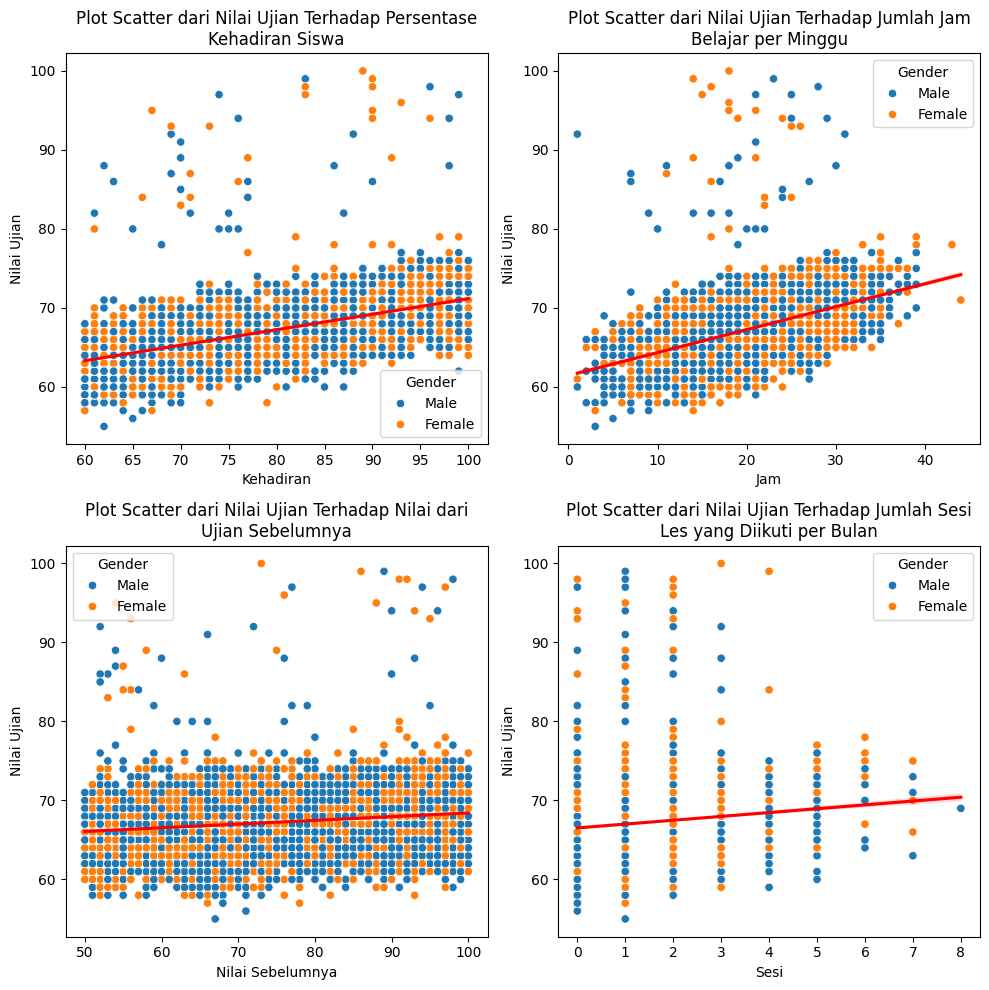

In [ ]:
# Membentuk plot dengan subplot sejumlah 4 berukuran 2 x 2
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Menambahkan satuan dari masing-masing kolom
labels = ["Kehadiran", "Jam", "Nilai Sebelumnya", "Sesi"]

# Membentuk dictionary dari variabel yang memiliki nilai korelasi lebih dari / sama dengan 0.1
data_x = {0: "Attendance", 1: "Hours_Studied", 2: "Previous_Scores", 3: "Tutoring_Sessions"}

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan berdasarkan dictionary di atas
deskripsi_kolom = ["Persentase Kehadiran Siswa",
                   "Jumlah Jam Belajar per Minggu",
                   "Nilai dari Ujian Sebelumnya",
                   "Jumlah Sesi Les yang Diikuti per Bulan"]

# Membentuk plot scatter untuk masing-masing kolom beserta garis trend
for keys, values in data_x.items():
    sns.scatterplot(data = df_cleaned, x = values, y = "Exam_Score", hue = "Gender", ax = axes[keys])
    sns.regplot(data = df_cleaned, x = values, y = "Exam_Score", scatter = False, ax = axes[keys], color=  "red")

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Scatter dari Nilai Ujian Terhadap {deskripsi_kolom[keys]}", width = 50))
    axes[keys].set_title(judul)
    axes[keys].title.set_size(12)

    # Menambahkan label sumbu x dan y pada plot
    axes[keys].set_xlabel(labels[keys])
    axes[keys].set_ylabel("Nilai Ujian")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan plot scatter yang disajikan, dapat disimpulkan bahwa:
*   Terdapat korelasi positif yang kuat antara persentase kehadiran siswa dan nilai ujian. Semakin tinggi kehadiran, semakin tinggi pula nilai ujian yang diraih.
*   Terdapat korelasi positif yang kuat antara jam belajar per minggu siswa dan nilai ujian. Semakin banyak jam belajar, semakin tinggi pula nilai ujian yang diraih.
*   Terdapat korelasi positif lemah antara nilai siswa sebelumnya dan nilai ujian. Dapat diartikan nilai sebelumnya hanya sedikit mempengaruhi nilai ujian.
*   Terdapat korelasi positif yang cukup kuat antara sesi les yang diikuti siswa per bulan dan nilai ujian. Tren visualnya menunjukkan garis tren yang naik, artinya semakin banyak sesi les yang diikuti, nilai ujian cenderung juga semakin tinggi, namun penyebaran data terlihat lebih banyak di bagian kiri.

# Data Preprocessing

Perlu dilakukan encoding terhadap seluruh data kategorikal agar seluruh data menjadi data numerik.

## Label Encoding

### Encoding Kategorikal

Encoding Kategorikal dilakukan terhadap 3 variabel, yaitu :
*   Extracurricular_Activities : Apakah Siswa Berpartisipasi dalam kegiatan ekstrakurikuler
*   Internet_Access : Apakah Siswa Memiliki Akses ke Internet
*   Learning_Disabilities : Apakah Siswa Memiliki Gangguan Pembelajaran

Karena masing-masing dari empat variabel tersebut hanya memiliki kategori ya (iya) dan tidak (tidak).




In [ ]:
# Menyusun daftar kolom kategorikal yang memiliki entri "Yes" dan "No"
Encoding_Kategorikal = ["Extracurricular_Activities", "Internet_Access", "Learning_Disabilities"]

# Mengonversi nilai "Yes" menjadi 1 dan "No" menjadi 0 untuk semua kolom dalam daftar tersebut
for kategori in Encoding_Kategorikal:
    df_cleaned.loc[:, kategori] = df_cleaned[kategori].map({"Yes": 1, "No": 0})

In [ ]:
df_cleaned.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                          0            7               73              Low   
1                          0            8               59              Low   
2                          1            7               91           Medium   
3                          1            8               98           Medium   
4                          1            6               65           Medium   

  Internet_Access  Tutoring_Sessions  ... Teacher_Quality School_Type  \
0               1                  0  ...          Medium      Public   
1               1                  2  ...          Medium      Public   
2               1                  2  ...          Medium      Public   
3               1                  1  ...          Medium      Public   
4               1                  3  ...            High      Public   

  Peer_Influence Physical_Activity  Learning_Disabilities  \
0       Positive                 3                      0   
1       Negative                 4                      0   
2        Neutral                 4                      0   
3       Negative                 4                      0   
4        Neutral                 4                      0   

  Parental_Education_Level Distance_from_Home  Gender Exam_Score  \
0              High School               Near    Male         67   
1                  College           Moderate  Female         61   
2             Postgraduate               Near    Male         74   
3              High School           Moderate    Male         71   
4                  College               Near  Female         70   

   Exam_Score_Bin  
0           65-70  
1           60-65  
2           70-75  
3           70-75  
4           70-75  

[5 rows x 21 columns]

### One Hot Encoding

One Hot Encoding diterapkan pada 2 variabel, yaitu :
*   School_Type : Jenis sekolah yang dihadiri siswa (Negeri, Swasta)
*   Gender : Jenis kelamin siswa (Laki-laki, Perempuan)





Karena kategori Gender tidak memiliki urutan tertentu

In [ ]:
# Membuat kolom dummy untuk kolom School_Type dan Gender
data_encoded = pd.get_dummies(df_cleaned[["School_Type", "Gender"]], drop_first=True)

# Menggabungkan data asli dengan kolom dummy yang telah dibuat
df_cleaned = pd.concat([df_cleaned, data_encoded], axis=1)

# Menghapus kolom School_Type dan Gender dari DataFrame
df_cleaned.drop(columns=["School_Type","Gender"], inplace=True)

In [ ]:
df_cleaned.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                          0            7               73              Low   
1                          0            8               59              Low   
2                          1            7               91           Medium   
3                          1            8               98           Medium   
4                          1            6               65           Medium   

  Internet_Access  Tutoring_Sessions  ... Teacher_Quality Peer_Influence  \
0               1                  0  ...          Medium       Positive   
1               1                  2  ...          Medium       Negative   
2               1                  2  ...          Medium        Neutral   
3               1                  1  ...          Medium       Negative   
4               1                  3  ...            High        Neutral   

  Physical_Activity  Learning_Disabilities Parental_Education_Level  \
0                 3                      0              High School   
1                 4                      0                  College   
2                 4                      0             Postgraduate   
3                 4                      0              High School   
4                 4                      0                  College   

  Distance_from_Home Exam_Score  Exam_Score_Bin School_Type_Public  \
0               Near         67           65-70               True   
1           Moderate         61           60-65               True   
2               Near         74           70-75               True   
3           Moderate         71           70-75               True   
4               Near         70           70-75               True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 21 columns]

### Encoding Ordinal

Encoding Ordinal dilakukan terhadap 8 variabel, yaitu :
*   Parental_Involvement : Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi)
*   Access_to_Resources : Ketersediaan akses ke sumber daya pendidikan (Rendah, Sedang, Tinggi)
*   Motivation_Level : Tingkat motivasi siswa (Rendah, Sedang, Tinggi)
*   Family_Income : Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi)
*   Teacher_Quality : Kualitas pengajaran (Rendah, Sedang, Tinggi)
*   Peer_Influence : Pengaruh teman sebaya terhadap kinerja akademik (Positif, Netral, Negatif)
*   Parental_Education_Level : Tingkat pendidikan tertinggi orang tua (Sekolah Menengah, Perguruan Tinggi, Pascasarjana)
*   Distance_from_Home : Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh)

Karena ada urutan dan makna yang jelas, data diatas termasuk dalam kategori ordinal.






In [ ]:
# Menentukan urutan untuk encoding
encoding_order = ["Low", "Medium", "High"]

# Membuat objek OrdinalEncoder dengan urutan encoding
ordinal_encoder = OrdinalEncoder(categories=[encoding_order] * 5)  # 5 kolom

# Menerapkan encoding ordinal pada kolom yang telah ditentukan
df_cleaned[["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]] = ordinal_encoder.fit_transform(df_cleaned[["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]])

# Menampilkan 5 baris pertama dari data setelah proses preprocessing
df_cleaned.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                   0.0                  2.0   
1             19          64                   0.0                  1.0   
2             24          98                   1.0                  1.0   
3             29          89                   0.0                  1.0   
4             19          92                   1.0                  1.0   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                          0            7               73               0.0   
1                          0            8               59               0.0   
2                          1            7               91               1.0   
3                          1            8               98               1.0   
4                          1            6               65               1.0   

  Internet_Access  Tutoring_Sessions  ...  Teacher_Quality  Peer_Influence  \
0               1                  0  ...              1.0        Positive   
1               1                  2  ...              1.0        Negative   
2               1                  2  ...              1.0         Neutral   
3               1                  1  ...              1.0        Negative   
4               1                  3  ...              2.0         Neutral   

  Physical_Activity  Learning_Disabilities Parental_Education_Level  \
0                 3                      0              High School   
1                 4                      0                  College   
2                 4                      0             Postgraduate   
3                 4                      0              High School   
4                 4                      0                  College   

  Distance_from_Home Exam_Score  Exam_Score_Bin School_Type_Public  \
0               Near         67           65-70               True   
1           Moderate         61           60-65               True   
2               Near         74           70-75               True   
3           Moderate         71           70-75               True   
4               Near         70           70-75               True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 21 columns]

In [ ]:
# Menentukan urutan untuk encoding
encoding_order = ["Negative", "Neutral", "Positive"]

# Membuat objek OrdinalEncoder dengan urutan encoding
ordinal_encoder = OrdinalEncoder(categories=[encoding_order])

# Mengubah kolom menjadi DataFrame
peer_influence_df = df_cleaned[["Peer_Influence"]]  # Menggunakan double bracket untuk DataFrame

# Menerapkan encoding ordinal pada kolom yang telah ditentukan
df_cleaned["Peer_Influence"] = ordinal_encoder.fit_transform(peer_influence_df)

# Menampilkan 5 baris pertama dari data setelah proses preprocessing
df_cleaned.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                   0.0                  2.0   
1             19          64                   0.0                  1.0   
2             24          98                   1.0                  1.0   
3             29          89                   0.0                  1.0   
4             19          92                   1.0                  1.0   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                          0            7               73               0.0   
1                          0            8               59               0.0   
2                          1            7               91               1.0   
3                          1            8               98               1.0   
4                          1            6               65               1.0   

  Internet_Access  Tutoring_Sessions  ...  Teacher_Quality  Peer_Influence  \
0               1                  0  ...              1.0             2.0   
1               1                  2  ...              1.0             0.0   
2               1                  2  ...              1.0             1.0   
3               1                  1  ...              1.0             0.0   
4               1                  3  ...              2.0             1.0   

   Physical_Activity  Learning_Disabilities Parental_Education_Level  \
0                  3                      0              High School   
1                  4                      0                  College   
2                  4                      0             Postgraduate   
3                  4                      0              High School   
4                  4                      0                  College   

  Distance_from_Home Exam_Score  Exam_Score_Bin School_Type_Public  \
0               Near         67           65-70               True   
1           Moderate         61           60-65               True   
2               Near         74           70-75               True   
3           Moderate         71           70-75               True   
4               Near         70           70-75               True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 21 columns]

In [ ]:
# Menentukan urutan untuk encoding
encoding_order = ["High School", "College", "Postgraduate"]

# Membuat objek OrdinalEncoder dengan urutan encoding
ordinal_encoder = OrdinalEncoder(categories=[encoding_order])

# Mengubah kolom menjadi DataFrame
peer_influence_df = df_cleaned[["Parental_Education_Level"]]  # Menggunakan double bracket untuk DataFrame

# Menerapkan encoding ordinal pada kolom yang telah ditentukan
df_cleaned["Parental_Education_Level"] = ordinal_encoder.fit_transform(peer_influence_df)

# Menampilkan 5 baris pertama dari data setelah proses preprocessing
df_cleaned.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                   0.0                  2.0   
1             19          64                   0.0                  1.0   
2             24          98                   1.0                  1.0   
3             29          89                   0.0                  1.0   
4             19          92                   1.0                  1.0   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                          0            7               73               0.0   
1                          0            8               59               0.0   
2                          1            7               91               1.0   
3                          1            8               98               1.0   
4                          1            6               65               1.0   

  Internet_Access  Tutoring_Sessions  ...  Teacher_Quality  Peer_Influence  \
0               1                  0  ...              1.0             2.0   
1               1                  2  ...              1.0             0.0   
2               1                  2  ...              1.0             1.0   
3               1                  1  ...              1.0             0.0   
4               1                  3  ...              2.0             1.0   

   Physical_Activity  Learning_Disabilities Parental_Education_Level  \
0                  3                      0                      0.0   
1                  4                      0                      1.0   
2                  4                      0                      2.0   
3                  4                      0                      0.0   
4                  4                      0                      1.0   

   Distance_from_Home Exam_Score  Exam_Score_Bin School_Type_Public  \
0                Near         67           65-70               True   
1            Moderate         61           60-65               True   
2                Near         74           70-75               True   
3            Moderate         71           70-75               True   
4                Near         70           70-75               True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 21 columns]

In [ ]:
# Menentukan urutan untuk encoding
encoding_order = ["Near", "Moderate", "Far"]

# Membuat objek OrdinalEncoder dengan urutan encoding
ordinal_encoder = OrdinalEncoder(categories=[encoding_order])

# Mengubah kolom menjadi DataFrame
peer_influence_df = df_cleaned[["Distance_from_Home"]]  # Menggunakan double bracket untuk DataFrame

# Menerapkan encoding ordinal pada kolom yang telah ditentukan
df_cleaned["Distance_from_Home"] = ordinal_encoder.fit_transform(peer_influence_df)

# Menampilkan 5 baris pertama dari data setelah proses preprocessing
df_cleaned.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                   0.0                  2.0   
1             19          64                   0.0                  1.0   
2             24          98                   1.0                  1.0   
3             29          89                   0.0                  1.0   
4             19          92                   1.0                  1.0   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                          0            7               73               0.0   
1                          0            8               59               0.0   
2                          1            7               91               1.0   
3                          1            8               98               1.0   
4                          1            6               65               1.0   

  Internet_Access  Tutoring_Sessions  ...  Teacher_Quality  Peer_Influence  \
0               1                  0  ...              1.0             2.0   
1               1                  2  ...              1.0             0.0   
2               1                  2  ...              1.0             1.0   
3               1                  1  ...              1.0             0.0   
4               1                  3  ...              2.0             1.0   

   Physical_Activity  Learning_Disabilities Parental_Education_Level  \
0                  3                      0                      0.0   
1                  4                      0                      1.0   
2                  4                      0                      2.0   
3                  4                      0                      0.0   
4                  4                      0                      1.0   

   Distance_from_Home  Exam_Score  Exam_Score_Bin School_Type_Public  \
0                 0.0          67           65-70               True   
1                 1.0          61           60-65               True   
2                 0.0          74           70-75               True   
3                 1.0          71           70-75               True   
4                 0.0          70           70-75               True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 21 columns]

## Split Data

Split data dilakukan untuk membagi dataset menjadi bagian pelatihan dan pengujian. Ini penting untuk mengevaluasi kinerja model pada data yang tidak terlihat, mencegah overfitting, dan memastikan model dapat generalisasi dengan baik.

Selanjutnya, karena variabel target kita adalah "Exam_Score" untuk mengevaluasi akurasi prediksi nilai ujian, kita akan menghapus kolom tersebut dari dataset dan menyimpannya dalam variabel baru.

In [ ]:
# Menyusun variabel X sebagai fitur yang mempengaruhi target
X = df_cleaned.drop(columns=["Exam_Score","Exam_Score_Bin"])

# Menyusun variabel y sebagai label target
y = df_cleaned["Exam_Score"]

Membagi data menjadi data training dan data testing dengan pembagian :
*   Data training sebesar 80% untuk melatih model
*   Data testing sebesar 20% untuk menguji model


Exam_Score_Bin di drop karena hanya digunakan untuk memudahkan visualisasi data dan tidak dibutuhkan lagi pada tahap modeling

In [ ]:
# Membagi data menjadi data training dan data testing dengan proporsi 80% untuk training dan 20% untuk testing,
# serta mengacak data setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Menampilkan ukuran dari dataset training dan testing untuk X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (5101, 19)
Ukuran X_test:  (1276, 19)
Ukuran y_train:  (5101,)
Ukuran y_test:  (1276,)


Selanjutnya, kita akan memeriksa data training dan data testing yang telah dibagi

In [ ]:
# Menampilkan 5 baris pertama dari data training X
X_train.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
5705              7          89                   2.0                  0.0   
4670             24          92                   0.0                  2.0   
5608             25          76                   1.0                  0.0   
2598             27          95                   1.0                  2.0   
734              26          76                   1.0                  1.0   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5705                          1            6               53   
4670                          1            5               81   
5608                          1            7               96   
2598                          0            8               88   
734                           0            5               64   

      Motivation_Level Internet_Access  Tutoring_Sessions  Family_Income  \
5705               1.0               1                  3            0.0   
4670               1.0               1                  2            0.0   
5608               1.0               1                  3            1.0   
2598               2.0               1                  3            1.0   
734                0.0               1                  0            1.0   

      Teacher_Quality  Peer_Influence  Physical_Activity  \
5705              2.0             1.0                  2   
4670              1.0             0.0                  3   
5608              1.0             2.0                  4   
2598              1.0             2.0                  2   
734               1.0             2.0                  5   

     Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
5705                     0                       0.0                 1.0   
4670                     1                       0.0                 0.0   
5608                     1                       0.0                 0.0   
2598                     0                       0.0                 2.0   
734                      0                       1.0                 2.0   

      School_Type_Public  Gender_Male  
5705               False         True  
4670               False         True  
5608                True        False  
2598               False        False  
734                 True        False

In [ ]:
# Menampilkan 5 baris pertama dari data testing X
X_test.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
3024              9          77                   0.0                  2.0   
2754             20          61                   2.0                  1.0   
6363             24          81                   1.0                  1.0   
3753             17          67                   2.0                  0.0   
5154             15          69                   0.0                  1.0   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
3024                          1            7               83   
2754                          1            8               80   
6363                          1            7               71   
3753                          0           10               71   
5154                          1            9               62   

      Motivation_Level Internet_Access  Tutoring_Sessions  Family_Income  \
3024               1.0               1                  1            0.0   
2754               1.0               1                  1            0.0   
6363               2.0               1                  1            1.0   
3753               1.0               1                  1            1.0   
5154               0.0               1                  2            1.0   

      Teacher_Quality  Peer_Influence  Physical_Activity  \
3024              2.0             1.0                  4   
2754              2.0             2.0                  3   
6363              2.0             1.0                  3   
3753              1.0             2.0                  3   
5154              2.0             1.0                  3   

     Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
3024                     1                       0.0                 2.0   
2754                     0                       0.0                 0.0   
6363                     0                       1.0                 0.0   
3753                     0                       0.0                 0.0   
5154                     0                       0.0                 1.0   

      School_Type_Public  Gender_Male  
3024               False         True  
2754                True         True  
6363                True         True  
3753                True         True  
5154                True         True

# Modeling

Seluruh model yang akan dibuat tidak menggunakan hyperparameter tuning melainkan akan menggunakan beberapa algoritma dan memilih model terbaik sebagai solusi

Dibuat sebuah fungsi untuk mengevaluasi model yang kemudian akan dipanggil untuk setiap model yang digunakan.

In [ ]:
def plot_model_performance(evaluation_results):
    # Membuat DataFrame dari hasil evaluasi
    eval_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
    eval_df.reset_index(inplace=True)
    eval_df.rename(columns={'index': 'Model'}, inplace=True)

    # Membuat plot
    plt.figure(figsize=(12, 6))
    eval_df_melted = eval_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

    sns.barplot(data=eval_df_melted, x='Model', y='Value', hue='Metric', palette='Blues_d')

    # Menambahkan label pada sumbu x dan y
    plt.xlabel('Model')
    plt.ylabel('Nilai Metrik')
    plt.title('Perbandingan Performa Model')

    # Memutar label pada sumbu x
    plt.xticks(rotation=45, ha='right')

    # Menambahkan grid
    plt.grid(axis='y')

    # Menampilkan plot
    plt.legend(title='Metrik')
    plt.tight_layout()
    plt.show()

In [ ]:
def compare_models(y_true, predictions):
    evaluation_results = {}

    for name, preds in predictions.items():
        mse = mean_squared_error(y_true, preds)
        mae = mean_absolute_error(y_true, preds)
        evaluation_results[name] = {
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae
        }

    # Menampilkan hasil evaluasi
    print("Model Performance Comparison:")
    eval_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
    print(eval_df)

    # Memanggil fungsi untuk menggambar plot
    plot_model_performance(evaluation_results)

    # Menyiapkan DataFrame untuk menampilkan hasil prediksi
    pred_dict = {'y_true': y_true[:10]}

    for name, preds in predictions.items():
        pred_dict[f'prediksi_{name}'] = preds[:10]

    results_df = pd.DataFrame(pred_dict)

    print("\nNilai Aktual vs Prediksi (10 contoh):")
    print(results_df)

### Linear Regression

In [ ]:
# Membuat dan melatih model regresi linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prediksi
predictions_lr = model_lr.predict(X_test)

## Decision Tree

In [ ]:
# Membuat dan melatih model decision tree
model_dt = DecisionTreeRegressor(max_depth=10)
model_dt.fit(X_train, y_train)

# Prediksi dan evaluasi
predictions_dt = model_dt.predict(X_test)

## Random Forest

In [ ]:
# Membuat dan melatih model random forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=30)
model_rf.fit(X_train, y_train)

# Prediksi
predictions_rf = model_rf.predict(X_test)

## Gradient Boosting

In [ ]:
# Membuat dan melatih model gradient boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model_gb.fit(X_train, y_train)

# Prediksi dan evaluasi
predictions_gb = model_gb.predict(X_test)

## Support Vector Regression (SVR)

In [ ]:
# Membuat dan melatih model support vector regression
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

# Prediksi dan evaluasi
predictions_svr = model_svr.predict(X_test)

1. Linear Regression (LR)

    Kelebihan:
Sederhana dan mudah dipahami.
Cepat dalam pelatihan dan prediksi.
Memiliki interpretasi yang jelas (koefisien menunjukkan pengaruh variabel).

    Kekurangan:
Hanya dapat menangkap hubungan linear.
Sensitif terhadap outlier.
Mengasumsikan bahwa hubungan antara variabel bersifat linier.
2. Decision Tree (DT)

    Kelebihan:
Mudah diinterpretasikan dan divisualisasikan.
Mampu menangkap hubungan non-linear.
Tidak memerlukan scaling data.

    Kekurangan:
Rentan terhadap overfitting, terutama dengan data yang kompleks.
Sensitif terhadap perubahan kecil dalam data.
Tidak robust terhadap noise.
3. Random Forest (RF)

    Kelebihan:
Lebih robust dibandingkan Decision Tree, mengurangi risiko overfitting.
Mampu menangkap interaksi yang kompleks antar fitur.
Memberikan estimasi pentingnya fitur.

    Kekurangan:
Lebih lambat dalam pelatihan dan prediksi dibandingkan model yang lebih sederhana.
Kurang interpretatif dibandingkan model linear.
Memerlukan lebih banyak memori.
4. Gradient Boosting (GB)

    Kelebihan:
Mampu menangkap hubungan non-linear yang kompleks.
Umumnya memberikan performa yang sangat baik dalam banyak kasus.
Mampu mengatasi missing values.

    Kekurangan:
Rentan terhadap overfitting jika tidak dituning dengan baik.
Lebih lambat dalam pelatihan dibandingkan dengan model lain.
Memerlukan pemahaman yang lebih dalam tentang hyperparameter.
5. Support Vector Regression (SVR)

    Kelebihan:
Mampu menangkap hubungan non-linear dengan kernel yang tepat.
Robust terhadap overfitting, terutama di dimensi tinggi.
Efektif pada dataset kecil hingga menengah.

    Kekurangan:
Tidak efisien pada dataset yang sangat besar.
Memerlukan pemilihan kernel yang tepat dan tuning hyperparameter.
Sulit dalam interpretasi model.

# Evaluations

Metrik evaluasi yang digunakan yaitu :
1.   Mean Squared Error (MSE):
Formula: MSE = Σ(y_true - y_pred)^2 / n

    Dimana:
y_true adalah nilai sebenarnya
y_pred adalah nilai prediksi
n adalah jumlah data

*   MSE mengukur rata-rata kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai MSE, semakin akurat model dalam memprediksi.
*   MSE memberikan bobot yang lebih besar untuk kesalahan prediksi yang besar. Ini karena perbedaan yang besar antara nilai prediksi dan aktual akan menghasilkan nilai yang lebih besar ketika dikuadratkan.
*   MSE berguna untuk mengidentifikasi model yang memiliki performa terbaik secara keseluruhan.


2. Mean Absolute Error (MAE):
Formula: MAE = Σ|y_true - y_pred| / n

    Dimana:
y_true adalah nilai sebenarnya
y_pred adalah nilai prediksi
n adalah jumlah data

*   MAE mengukur rata-rata nilai absolut perbedaan antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai MAE, semakin akurat model dalam memprediksi.
*   MAE tidak memberikan bobot yang lebih besar untuk kesalahan prediksi yang besar. Ini karena MAE hanya mengukur nilai absolut perbedaan, tanpa mengkuadratkannya.
*   MAE berguna untuk mengidentifikasi model yang memiliki konsistensi yang baik dalam memprediksi, tanpa terlalu dipengaruhi oleh kesalahan prediksi yang besar.

Model Performance Comparison:
     Mean Squared Error  Mean Absolute Error
LR             3.508515             0.454501
DT            13.946788             1.773880
RF             5.225100             1.142210
GB             4.387732             0.832583
SVR            5.093583             1.139980


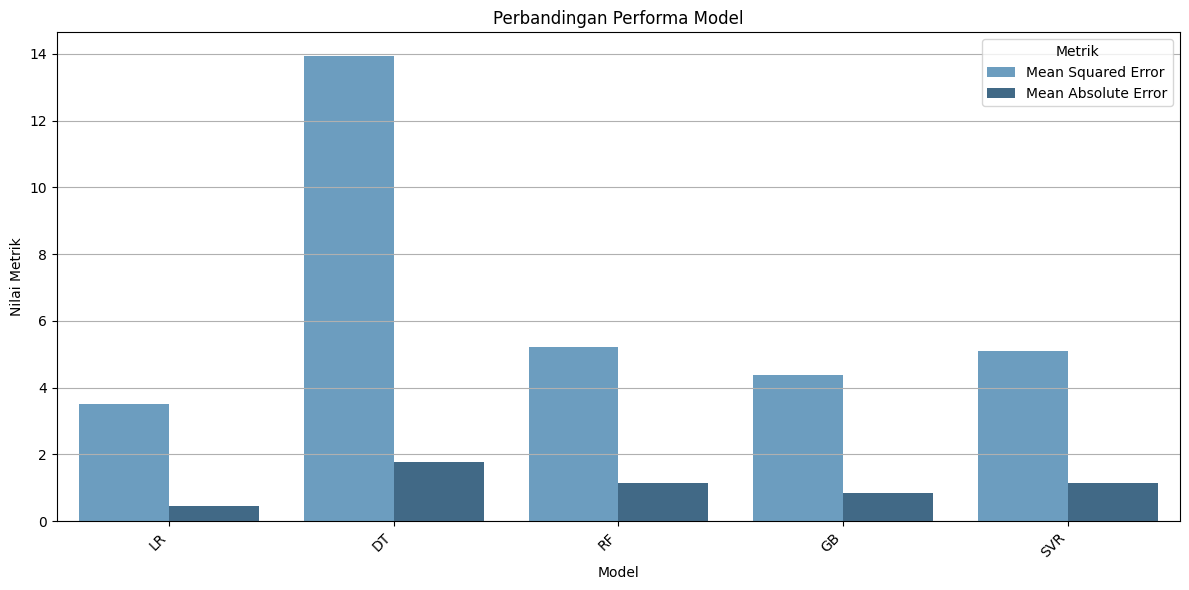


Nilai Aktual vs Prediksi (10 contoh):
      y_true  prediksi_LR  prediksi_DT  prediksi_RF  prediksi_GB  prediksi_SVR
3024      62    62.123519    61.625000        63.71    63.707048     63.343930
2754      65    65.053911    64.888889        64.17    65.266467     63.599576
6363      70    69.709080    67.287500        68.32    68.856883     68.401405
3753      63    63.315235    62.645161        63.10    62.564249     63.268075
5154      62    61.858399    61.285714        61.59    61.404107     62.536896
2339      66    65.883455    66.500000        66.75    66.371123     66.859308
3500      68    67.799348    68.000000        69.08    68.613654     68.869134
1563      66    66.603065    65.000000        68.31    67.139535     65.750518
4493      65    64.944518    65.650000        65.15    65.212079     65.453077
1001      72    72.611754    71.500000        72.90    72.266877     72.486120


In [ ]:
# Contoh penggunaan
predictions = {
    'LR': predictions_lr,
    'DT': predictions_dt,
    'RF': predictions_rf,
    'GB': predictions_gb,
    'SVR': predictions_svr
}

compare_models(y_test, predictions)

Berdasarkan grafik "Perbandingan Performa Model", model Linear Regression (LR) memiliki nilai Mean Squared Error (MSE) terendah, yaitu 3.51, serta nilai Mean Absolute Error (MAE) yang juga cukup rendah. Ini menunjukkan bahwa model Linear Regression memiliki akurasi prediksi terbaik di antara model-model yang dibandingkan.

Model Gradient Boosting (GB) juga menunjukkan performa yang sangat baik, dengan nilai MSE 4.39 dan MAE yang relatif rendah. Meskipun sedikit lebih tinggi dibandingkan Linear Regression, Gradient Boosting masih merupakan salah satu model terbaik dalam kasus ini.

Sementara itu, model Random Forest (RF) memiliki nilai MSE 5.23 dan MAE yang sedikit lebih tinggi. Support Vector Regression (SVR) memiliki nilai MSE 5.09 dan MAE yang juga lebih tinggi daripada Linear Regression dan Gradient Boosting. Meskipun masih menunjukkan performa yang cukup baik, model-model ini tidak unggul dibandingkan Linear Regression dan Gradient Boosting.

Model Decision Tree (DT) memiliki nilai MSE paling tinggi, yaitu 12.82, serta nilai MAE yang juga lebih buruk daripada model-model lainnya. Ini menunjukkan bahwa model Decision Tree memiliki performa paling rendah di antara model-model yang dibandingkan.

Secara keseluruhan, dapat disimpulkan bahwa model Linear Regression merupakan model terbaik berdasarkan nilai MSE dan MAE yang paling rendah.

Berdasarkan tabel "Nilai Aktual vs Prediksi (10 contoh)", kita dapat melihat bahwa model Linear Regression (LR) memiliki prediksi yang paling mendekati nilai aktual (y_true) di antara model-model yang dibandingkan.

Dengan demikian, dapat disimpulkan bahwa di antara model-model yang dibandingkan, Linear Regression (LR) adalah model yang paling akurat dalam memprediksi nilai sebenarnya.

Model LR tampak paling konsisten dalam memberikan prediksi yang mendekati nilai aktual.